# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Processing Climate and Soil Data

# Time Series Analysis

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

file_path= '/content/POWER_Point_Daily_20150101_20241101_036d78N_0119d42W_LST_California.csv'
df = pd.read_csv(file_path, skiprows=15, header=None)
df.columns = [
    "Year", "Day", "Temperature_Max", "Relative_Humidity", "Precipitation", "Wind_Speed", "Surface Soil Wetness", "Root Zone Soil Wetness"
]


In [ ]:
df.head()

,Year,Day,Temperature_Max,Relative_Humidity,Precipitation,Wind_Speed,Surface Soil Wetness,Root Zone Soil Wetness
0,2015,1,9.37,43.38,0.0,2.54,0.56,0.59
1,2015,2,9.87,49.00,0.0,1.73,0.56,0.59
2,2015,3,11.43,53.00,0.0,1.60,0.56,0.59
3,2015,4,14.44,55.62,0.0,1.70,0.56,0.59
4,2015,5,19.90,53.69,0.0,2.07,0.56,0.59


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    3593 non-null   int64  
 1   Day                     3593 non-null   int64  
 2   Temperature_Max         3593 non-null   float64
 3   Relative_Humidity       3593 non-null   float64
 4   Precipitation           3593 non-null   float64
 5   Wind_Speed              3593 non-null   float64
 6   Surface Soil Wetness    3593 non-null   float64
 7   Root Zone Soil Wetness  3593 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 224.7 KB


In [ ]:
# Ensure the column names are correct ('YEAR' and 'DOY')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64') # Convert to numeric, handle errors, then to Int64
df['Day'] = pd.to_numeric(df['Day'], errors='coerce').astype('Int64')  # Convert to numeric, handle errors, then to Int64
df = df.dropna(subset=['Year', 'Day'])  # Drop rows with missing values in 'Year' or 'Day'

# Ensure 'Year' and 'Day' are integers before applying datetime
df['DATE'] = df.apply(lambda row: datetime(int(row['Year']), 1, 1) + timedelta(days=int(row['Day']) - 1), axis=1)

# Drop the YEAR and DOY columns if they're no longer needed
df.drop(['Year', 'Day'], axis=1, inplace=True)

df = df[[
    "DATE", "Temperature_Max", "Relative_Humidity", "Precipitation", "Wind_Speed", "Surface Soil Wetness", "Root Zone Soil Wetness"
]]

# Display the first few rows of the updated dataset
df.head()

        DATE  Temperature_Max  Relative_Humidity  Precipitation  Wind_Speed  \
0 2015-01-01             9.37              43.38            0.0        2.54   
1 2015-01-02             9.87              49.00            0.0        1.73   
2 2015-01-03            11.43              53.00            0.0        1.60   
3 2015-01-04            14.44              55.62            0.0        1.70   
4 2015-01-05            19.90              53.69            0.0        2.07   

   Surface Soil Wetness  Root Zone Soil Wetness  
0                  0.56                    0.59  
1                  0.56                    0.59  
2                  0.56                    0.59  
3                  0.56                    0.59  
4                  0.56                    0.59  


In [ ]:

# Save the updated DataFrame to a new CSV file
df.to_csv('Cleaned_Weather_Data_for_Russia.csv', index=False)


In [ ]:
df.head()

,DATE,Temperature_Max,Relative_Humidity,Precipitation,Wind_Speed,Surface Soil Wetness,Root Zone Soil Wetness
0,2015-01-01,9.37,43.38,0.0,2.54,0.56,0.59
1,2015-01-02,9.87,49.00,0.0,1.73,0.56,0.59
2,2015-01-03,11.43,53.00,0.0,1.60,0.56,0.59
3,2015-01-04,14.44,55.62,0.0,1.70,0.56,0.59
4,2015-01-05,19.90,53.69,0.0,2.07,0.56,0.59


In [ ]:
# Set 'DATE' as the index and convert it to datetime if not already
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')

# Now you can work with the time series data
print(df.head())


            Temperature_Max  Relative_Humidity  Precipitation  Wind_Speed  \
DATE                                                                        
2015-01-01             9.37              43.38            0.0        2.54   
2015-01-02             9.87              49.00            0.0        1.73   
2015-01-03            11.43              53.00            0.0        1.60   
2015-01-04            14.44              55.62            0.0        1.70   
2015-01-05            19.90              53.69            0.0        2.07   

            Surface Soil Wetness  Root Zone Soil Wetness  
DATE                                                      
2015-01-01                  0.56                    0.59  
2015-01-02                  0.56                    0.59  
2015-01-03                  0.56                    0.59  
2015-01-04                  0.56                    0.59  
2015-01-05                  0.56                    0.59  


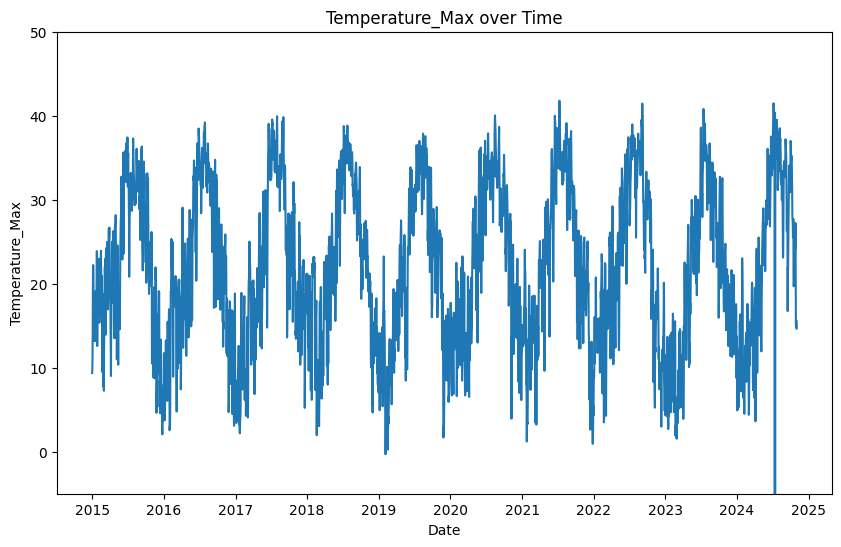

In [ ]:
# Example operations:

# Resample to monthly frequency and calculate the mean
monthly_df = df.resample('M').mean()
# print("\nMonthly Data:\n", monthly_df.head())

# Resample to yearly frequency and calculate the mean
yearly_df = df.resample('Y').mean()
# print("\nYearly Data:\n", yearly_df.head())


# Plot a specific variable over time
plt.figure(figsize=(10, 6))
plt.plot(df['Temperature_Max'])
plt.xlabel('Date')
plt.ylabel('Temperature_Max')
plt.title('Temperature_Max over Time')

# Set the y-axis limits to a more appropriate range
plt.ylim(-5, 50) # Example: Adjust these values as needed

plt.show()

In [ ]:
df.describe()

,Temperature_Max,Relative_Humidity,Precipitation,Wind_Speed,Surface Soil Wetness,Root Zone Soil Wetness
count,3593.000000,3593.000000,3593.000000,3593.000000,3593.000000,3593.000000
mean,21.305555,46.625750,0.711840,1.367465,-33.750100,-33.644762
std,30.970220,37.467054,29.499628,28.926140,181.755853,181.775587
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,14.740000,28.380000,0.000000,1.910000,0.200000,0.460000
50%,21.960000,45.060000,0.000000,2.190000,0.480000,0.510000
75%,30.370000,64.000000,0.100000,2.430000,0.610000,0.620000
max,41.790000,100.000000,89.310000,6.700000,0.980000,1.000000


In [ ]:
for i in range(len(df.index)):
  if df['Temperature_Max'][i] == min(df['Temperature_Max']):
    print(df['Relative_Humidity'][i])

-999.0
-999.0
-999.0


## 2. Processing Fire Data

In [ ]:
# Load the dataset
file_path = '/content/fire_archive_M-C61_549898.csv'  # Choose your path
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,36.3010,-119.1076,307.7,1.4,1.2,1/2/15,1015,Aqua,MODIS,72,6.03,271.7,23.1,N,0
1,38.8307,-119.0749,312.5,1.1,1.0,1/3/15,1844,Terra,MODIS,73,6.03,276.2,15.0,D,0
2,32.5098,-115.1769,302.8,1.3,1.1,1/3/15,1846,Terra,MODIS,54,6.03,290.5,6.2,D,0
3,32.5913,-114.5882,307.8,1.4,1.2,1/3/15,1846,Terra,MODIS,66,6.03,287.8,11.9,D,0
4,32.5121,-115.1901,328.5,1.3,1.1,1/3/15,1846,Terra,MODIS,86,6.03,291.2,37.4,D,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199382 entries, 0 to 199381
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    199382 non-null  float64
 1   longitude   199382 non-null  float64
 2   brightness  199382 non-null  float64
 3   scan        199382 non-null  float64
 4   track       199382 non-null  float64
 5   acq_date    199382 non-null  object 
 6   acq_time    199382 non-null  int64  
 7   satellite   199382 non-null  object 
 8   instrument  199382 non-null  object 
 9   confidence  199382 non-null  int64  
 10  version     199382 non-null  float64
 11  bright_t31  199382 non-null  float64
 12  frp         199382 non-null  float64
 13  daynight    199382 non-null  object 
 14  type        199382 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 22.8+ MB


In [ ]:
from datetime import datetime, timedelta
import pytz

# Load the dataset
df_fire = pd.read_csv(file_path)

# Convert acquisition time to HH:MM format
df_fire['acq_time'] = df_fire['acq_time'].astype(str).str.zfill(4)
df_fire['utc_time'] = df_fire['acq_time'].str[:2] + ':' + df_fire['acq_time'].str[2:]

# Add the date to create a full datetime in UTC
df_fire['acq_datetime'] = pd.to_datetime(df_fire['acq_date'] + ' ' + df_fire['utc_time'], format='%m/%d/%y %H:%M')

# Define the time zone for the region (e.g., California -> PST/PDT)
local_timezone = pytz.timezone('America/Los_Angeles')

# Convert UTC to local time
df_fire['local_time_processed'] = df_fire['acq_datetime'].dt.tz_localize('UTC').dt.tz_convert(local_timezone)

df_fire['local_date'] = df_fire['local_time_processed'].dt.date

# Extract the time from the 'local_time' column
df_fire['local_time'] = df_fire['local_time_processed'].dt.time

In [ ]:
df_fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,utc_time,acq_datetime,local_time_processed,local_date,local_time
0,36.3010,-119.1076,307.7,1.4,1.2,1/2/15,1015,Aqua,MODIS,72,6.03,271.7,23.1,N,0,10:15,2015-01-02 10:15:00,2015-01-02 02:15:00-08:00,2015-01-02,02:15:00
1,38.8307,-119.0749,312.5,1.1,1.0,1/3/15,1844,Terra,MODIS,73,6.03,276.2,15.0,D,0,18:44,2015-01-03 18:44:00,2015-01-03 10:44:00-08:00,2015-01-03,10:44:00
2,32.5098,-115.1769,302.8,1.3,1.1,1/3/15,1846,Terra,MODIS,54,6.03,290.5,6.2,D,0,18:46,2015-01-03 18:46:00,2015-01-03 10:46:00-08:00,2015-01-03,10:46:00
3,32.5913,-114.5882,307.8,1.4,1.2,1/3/15,1846,Terra,MODIS,66,6.03,287.8,11.9,D,0,18:46,2015-01-03 18:46:00,2015-01-03 10:46:00-08:00,2015-01-03,10:46:00
4,32.5121,-115.1901,328.5,1.3,1.1,1/3/15,1846,Terra,MODIS,86,6.03,291.2,37.4,D,0,18:46,2015-01-03 18:46:00,2015-01-03 10:46:00-08:00,2015-01-03,10:46:00


In [ ]:
# # Extract the hour for day/night comparison
# df_fire['local_hour'] = df_fire['local_time'].dt.hour

# # Print a few rows to check the conversion
# print(df_fire[['acq_datetime', 'local_time', 'daynight']].head())

# # Analyze inconsistencies between local time and "daynight"
# df_fire['daynight_mismatch'] = (df_fire['local_hour'].between(6, 18, inclusive="neither") & (df_fire['daynight'] == 'D')) | \
#                                (~df_fire['local_hour'].between(6, 18, inclusive="neither") & (df_fire['daynight'] == 'N'))

# # print("Number of mismatches:", df_fire['daynight_mismatch'].sum())
# df_fire.head()

In [ ]:
# Select only the relevant columns
columns_to_keep = ['latitude', 'longitude', 'local_date', 'local_time', 'brightness', 'confidence', 'frp', 'daynight']
df_cleaned = df_fire[columns_to_keep]

# Convert 'acq_date' to datetime format
df_cleaned['local_date'] = pd.to_datetime(df_cleaned['local_date'])

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Print cleaned dataset info
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199382 entries, 0 to 199381
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   latitude    199382 non-null  float64       
 1   longitude   199382 non-null  float64       
 2   local_date  199382 non-null  datetime64[ns]
 3   local_time  199382 non-null  object        
 4   brightness  199382 non-null  float64       
 5   confidence  199382 non-null  int64         
 6   frp         199382 non-null  float64       
 7   daynight    199382 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 12.2+ MB
None


In [ ]:
def time_period(acq_time):
    if acq_time.hour < 6:
        return 'Early Morning'
    elif acq_time.hour < 12:
        return 'Morning'
    elif acq_time.hour < 16:
        return 'Afternoon'
    elif acq_time.hour < 19:
        return 'Evening'
    else:
        return 'Night'

df_cleaned['Time_Period'] = df_cleaned['local_time'].apply(time_period)

In [ ]:
df_cleaned.head()

,latitude,longitude,local_date,local_time,brightness,confidence,frp,daynight,Time_Period
0,36.3010,-119.1076,2015-01-02,02:15:00,307.7,72,23.1,N,Early Morning
1,38.8307,-119.0749,2015-01-03,10:44:00,312.5,73,15.0,D,Morning
2,32.5098,-115.1769,2015-01-03,10:46:00,302.8,54,6.2,D,Morning
3,32.5913,-114.5882,2015-01-03,10:46:00,307.8,66,11.9,D,Morning
4,32.5121,-115.1901,2015-01-03,10:46:00,328.5,86,37.4,D,Morning


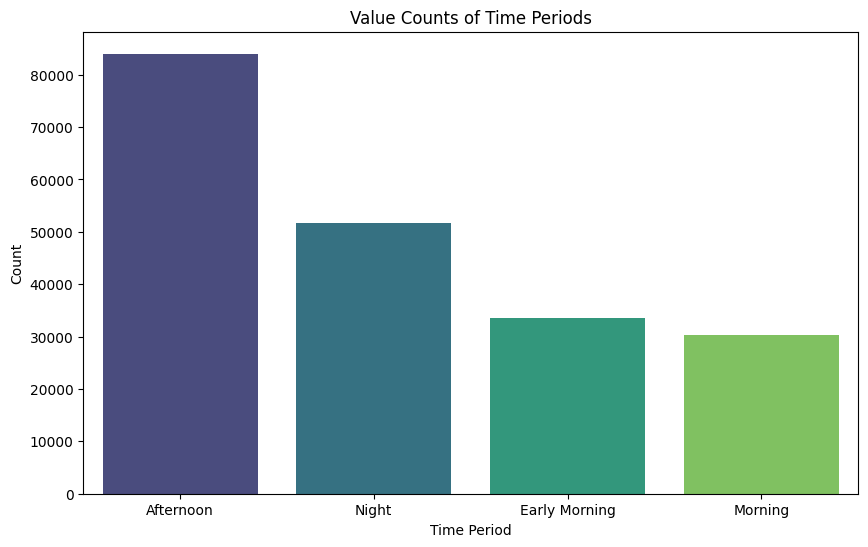

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

time_period_counts = df_cleaned['Time_Period'].value_counts()

# Create the bar plot with unique colors for each bar
plt.figure(figsize=(10, 6))
sns.barplot(x=time_period_counts.index, y=time_period_counts.values, palette='viridis')  # Use a color palette

plt.xlabel('Time Period')
plt.ylabel('Count')
plt.title('Value Counts of Time Periods')
plt.show()

In [ ]:
# Add a 'Confidence_Class' column based on the confidence percentage
def classify_confidence(confidence):
    if confidence <= 30:
        return 'Low'
    elif 30 < confidence <= 80:
        return 'Nominal'
    else:
        return 'High'

df_cleaned['Confidence_Class'] = df_cleaned['confidence'].apply(classify_confidence)

In [ ]:
df_cleaned.head()

,latitude,longitude,local_date,local_time,brightness,confidence,frp,daynight,Time_Period,Confidence_Class
0,36.3010,-119.1076,2015-01-02,02:15:00,307.7,72,23.1,N,Early Morning,Nominal
1,38.8307,-119.0749,2015-01-03,10:44:00,312.5,73,15.0,D,Morning,Nominal
2,32.5098,-115.1769,2015-01-03,10:46:00,302.8,54,6.2,D,Morning,Nominal
3,32.5913,-114.5882,2015-01-03,10:46:00,307.8,66,11.9,D,Morning,Nominal
4,32.5121,-115.1901,2015-01-03,10:46:00,328.5,86,37.4,D,Morning,High


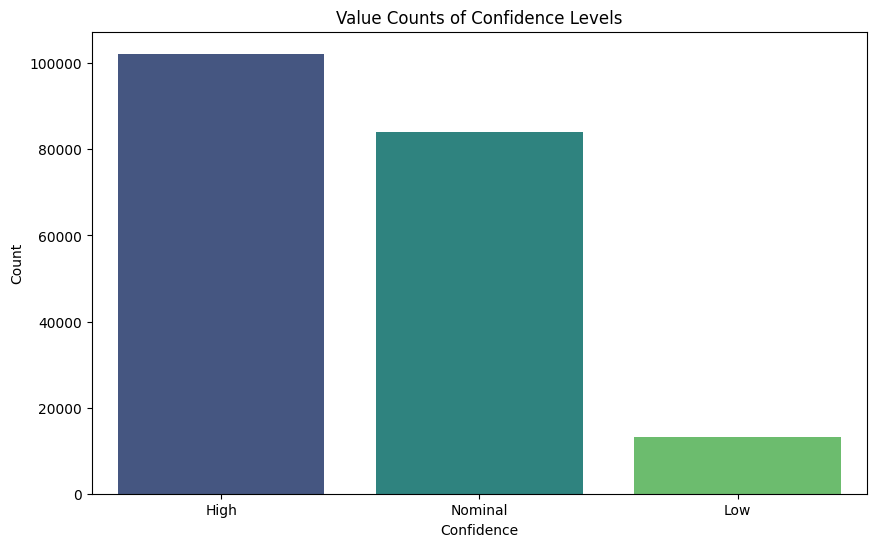

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

confidence_counts = df_cleaned['Confidence_Class'].value_counts()

# Create the bar plot with unique colors for each bar
plt.figure(figsize=(10, 6))
sns.barplot(x=confidence_counts.index, y=confidence_counts.values, palette='viridis')  # Use a color palette

plt.xlabel('Confidence')
plt.ylabel('Count')
plt.title('Value Counts of Confidence Levels')
plt.show()

In [ ]:
# View distribution of confidence classes
print(df_cleaned['Confidence_Class'].value_counts())


Confidence_Class
High       102217
Nominal     84103
Low         13062
Name: count, dtype: int64


In [ ]:
high_confidence_fires = df_cleaned[df_cleaned['Confidence_Class'] == 'High']
high_confidence_fires.head()

,latitude,longitude,local_date,local_time,brightness,confidence,frp,daynight,Time_Period,Confidence_Class
4,32.5121,-115.1901,2015-01-03,10:46:00,328.5,86,37.4,D,Morning,High
11,38.8901,-122.9681,2015-01-07,13:37:00,322.2,81,28.3,D,Afternoon,High
12,38.8884,-122.9837,2015-01-07,13:37:00,321.4,81,26.8,D,Afternoon,High
29,39.1576,-120.6349,2015-01-12,13:56:00,322.6,82,140.0,D,Afternoon,High
31,34.4974,-115.5057,2015-01-12,21:41:00,311.0,81,15.7,N,Night,High


In [ ]:
high_confidence_fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102217 entries, 4 to 199380
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   latitude          102217 non-null  float64       
 1   longitude         102217 non-null  float64       
 2   local_date        102217 non-null  datetime64[ns]
 3   local_time        102217 non-null  object        
 4   brightness        102217 non-null  float64       
 5   confidence        102217 non-null  int64         
 6   frp               102217 non-null  float64       
 7   daynight          102217 non-null  object        
 8   Time_Period       102217 non-null  object        
 9   Confidence_Class  102217 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 8.6+ MB


In [ ]:
def classify_zone(lat, lon):
    if (35 <= lat <= 39) and (-122 <= lon <= -118):
        return "Central Valley"
    elif (lat >= 37 or lat <= 33) and (lon <= -118):
        return "Mountain"
    elif lat >= 35 and lon <= -120:
        return "Coastal"
    elif lat >= 32 and lon >= -117 and lon <= -114:  # Extended Desert Zone
        return "Desert"
    else:
        return "Other"

#Apply the classification function to creata a new column
high_confidence_fires['Zone_Class'] = high_confidence_fires.apply(lambda row: classify_zone(row['latitude'], row['longitude']), axis=1)

In [ ]:
high_confidence_fires.head()

,latitude,longitude,local_date,local_time,brightness,confidence,frp,daynight,Time_Period,Confidence_Class,Zone_Class
4,32.5121,-115.1901,2015-01-03,10:46:00,328.5,86,37.4,D,Morning,High,Desert
11,38.8901,-122.9681,2015-01-07,13:37:00,322.2,81,28.3,D,Afternoon,High,Mountain
12,38.8884,-122.9837,2015-01-07,13:37:00,321.4,81,26.8,D,Afternoon,High,Mountain
29,39.1576,-120.6349,2015-01-12,13:56:00,322.6,82,140.0,D,Afternoon,High,Mountain
31,34.4974,-115.5057,2015-01-12,21:41:00,311.0,81,15.7,N,Night,High,Desert


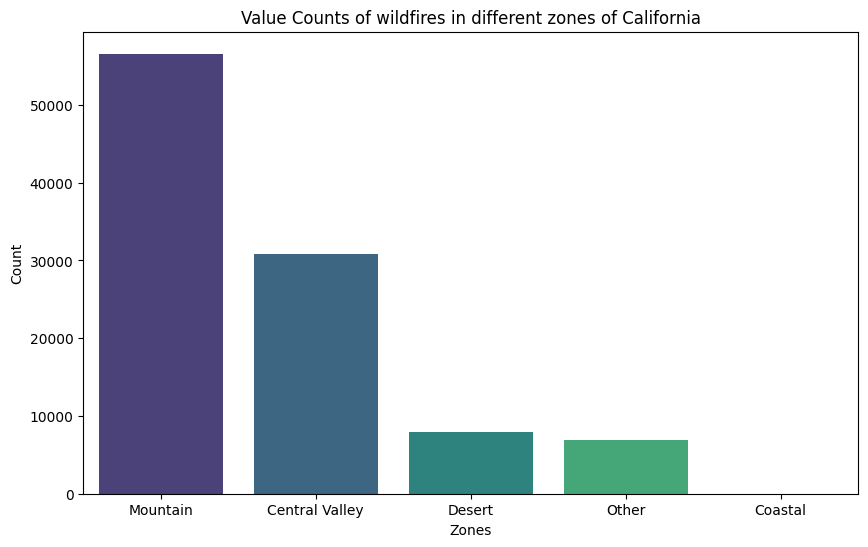

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Zone_Counts = high_confidence_fires['Zone_Class'].value_counts()

# Create the bar plot with unique colors for each bar
plt.figure(figsize=(10, 6))
sns.barplot(x=Zone_Counts.index, y=Zone_Counts.values, palette='viridis')  # Use a color palette

plt.xlabel('Zones')
plt.ylabel('Count')
plt.title('Value Counts of wildfires in different zones of California')
plt.show()

In [ ]:
high_confidence_fires['Zone_Class'].value_counts()

,count
Zone_Class,
Mountain,56580
Central Valley,30839
Desert,7943
Other,6853
Coastal,2


## Focus of research region: Central Valley

In [ ]:
central_zone_fires = high_confidence_fires[
    (high_confidence_fires['latitude'] >= 35) & (high_confidence_fires['latitude'] <= 39) &
    (high_confidence_fires['longitude'] >= -122) & (high_confidence_fires['longitude'] <= -118)
]
central_zone_fires.head()

,latitude,longitude,local_date,local_time,brightness,confidence,frp,daynight,Time_Period,Confidence_Class,Zone_Class
205,38.9498,-120.3980,2015-02-05,11:27:00,376.1,100,374.0,D,Morning,High,Central Valley
206,38.9452,-120.3769,2015-02-05,11:27:00,341.0,92,125.7,D,Morning,High,Central Valley
208,38.9537,-120.3795,2015-02-05,11:27:00,328.7,86,78.3,D,Morning,High,Central Valley
209,38.9463,-120.4048,2015-02-05,11:27:00,351.9,97,180.9,D,Morning,High,Central Valley
210,38.9418,-120.3837,2015-02-05,11:27:00,346.4,94,150.2,D,Morning,High,Central Valley


In [ ]:
central_zone_fires.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30839 entries, 205 to 199361
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   latitude          30839 non-null  float64       
 1   longitude         30839 non-null  float64       
 2   local_date        30839 non-null  datetime64[ns]
 3   local_time        30839 non-null  object        
 4   brightness        30839 non-null  float64       
 5   confidence        30839 non-null  int64         
 6   frp               30839 non-null  float64       
 7   daynight          30839 non-null  object        
 8   Time_Period       30839 non-null  object        
 9   Confidence_Class  30839 non-null  object        
 10  Zone_Class        30839 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 2.8+ MB


In [ ]:
# central_zone_fires.to_csv('California_Fires.csv', index=False)

In [ ]:
print(high_confidence_fires['latitude'].min(),
high_confidence_fires['latitude'].max(),
high_confidence_fires['longitude'].min(),
high_confidence_fires['longitude'].max())

32.0006 42.0 -123.9995 -114.0006


In [ ]:
# Define coordinate bins
lat_bins = [32, 35, 38, 43]
lon_bins = [-125, -123, -120, -114]

# Create latitude and longitude groups separately
high_confidence_fires['Latitude_Group'] = pd.cut(high_confidence_fires['latitude'], bins=lat_bins, labels=["South", "Central", "North"])
high_confidence_fires['Longitude_Group'] = pd.cut(high_confidence_fires['longitude'], bins=lon_bins, labels=["West", "Central", "East"])

# Combine groups using .astype(str) for concatenation
high_confidence_fires['Coordinate_Group'] = high_confidence_fires['Latitude_Group'].astype(str) + "-" + high_confidence_fires['Longitude_Group'].astype(str)

#Duplicate column of frp
high_confidence_fires['frp_count'] = high_confidence_fires['frp']

# Group by Date and Coordinate Group
generalized_fires = high_confidence_fires.groupby(['local_date', 'Coordinate_Group']).agg({
    'local_time': 'min',  # Earliest time for that day
    'brightness': ['max', 'mean'],  # Max and mean brightness
    'confidence': ['max', 'mean'],  # Max and mean confidence
    'frp': 'max',  # Total Fire Radiative Power
    'daynight': lambda x: x.value_counts().idxmax(),  # Most frequent value
    'Time_Period': lambda x: x.value_counts().idxmax(),  # Most frequent value
    'frp_count': 'count'  # Count of fire incidents
}).reset_index()


# Flatten multi-level columns
generalized_fires.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in generalized_fires.columns.values]

# Save the generalized dataset
generalized_fires.to_csv('generalized_fire_dataset', index=False)



In [ ]:
generalized_fires.rename(
    columns={
        'daynight_<lambda>': 'Day_Night',
        'Time_Period_<lambda>': 'Time_Period',
        'local_time_min': 'Local_Time_Min',
        'brightness_max': 'Max_Brightness',
        'brightness_mean': 'Mean_Brightness',
        'confidence_max': 'Max_Confidence',
        'confidence_mean': 'Mean_Confidence',
        'frp_max': 'FRP',
        'frp_count_count': 'Total_Fire_Incidents'
    }, inplace=True
)


In [ ]:
generalized_fires['FRP'].max()

11944.2

In [ ]:
def time_period(acq_time):
    return acq_time.strftime('%H:%M')

generalized_fires['local_Time_Min'] = generalized_fires['Local_Time_Min'].apply(time_period)

In [ ]:
generalized_fires.head(5)

,local_date_,Coordinate_Group_,Local_Time_Min,Max_Brightness,Mean_Brightness,Max_Confidence,Mean_Confidence,FRP,Day_Night,Time_Period,Total_Fire_Incidents,local_Time_Min
0,2015-01-03,South-East,10:46:00,328.5,328.500000,86,86.000000,37.4,D,Morning,1,10:46
1,2015-01-07,North-Central,13:37:00,322.2,321.800000,81,81.000000,28.3,D,Afternoon,2,13:37
2,2015-01-12,North-Central,13:56:00,322.6,322.600000,82,82.000000,140.0,D,Afternoon,1,13:56
3,2015-01-12,South-East,21:41:00,311.0,311.000000,81,81.000000,15.7,N,Night,1,21:41
4,2015-01-13,North-Central,13:01:00,332.2,326.966667,88,84.666667,40.3,D,Afternoon,3,13:01


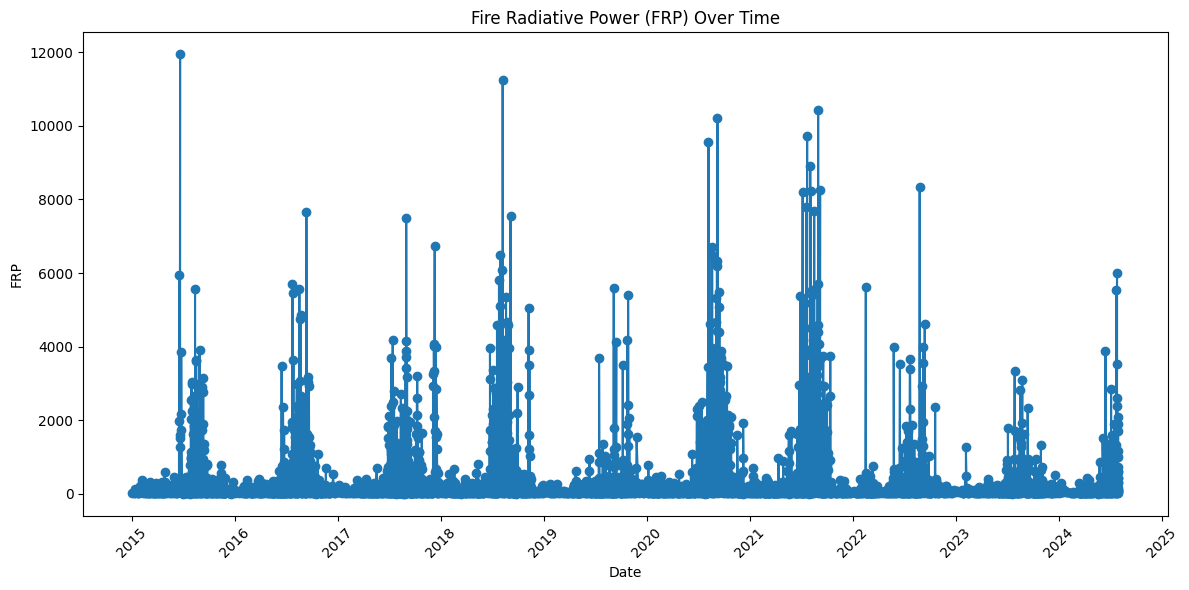

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(generalized_fires['local_date_'], generalized_fires['FRP'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('FRP')
plt.title('Fire Radiative Power (FRP) Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

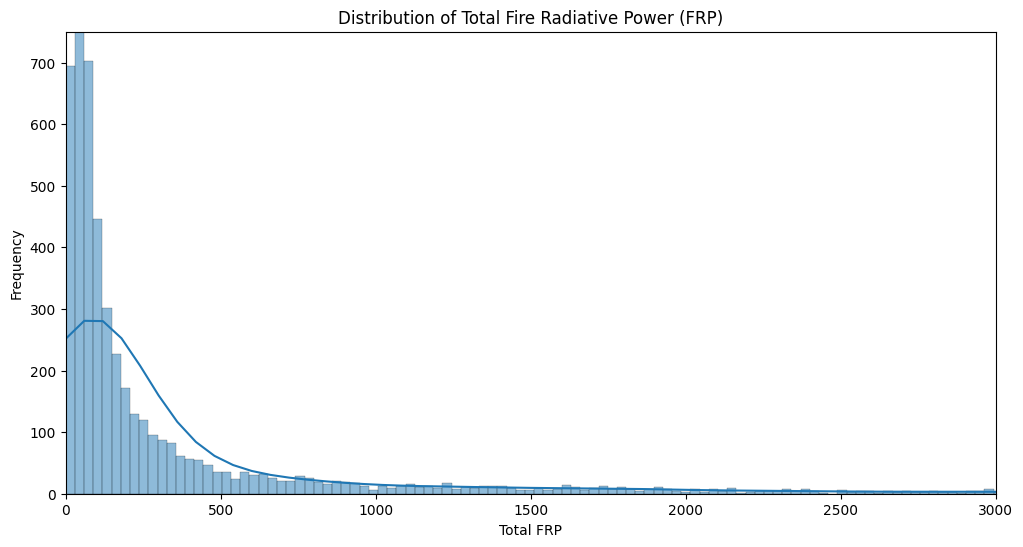

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(generalized_fires['FRP'], kde=True)
plt.title('Distribution of Total Fire Radiative Power (FRP)')
plt.xlabel('Total FRP')
plt.ylabel('Frequency')

plt.ylim(0, 750)
plt.xlim(0, 3000)

plt.show()

In [ ]:
generalized_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5537 entries, 0 to 5536
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   local_date_        5537 non-null   datetime64[ns]
 1   Coordinate_Group_  5537 non-null   object        
 2   Local_Time_Min     5537 non-null   object        
 3   Max_Brightness     5537 non-null   float64       
 4   Mean_Brightness    5537 non-null   float64       
 5   Max_Confidence     5537 non-null   int64         
 6   Mean_Confidence    5537 non-null   float64       
 7   Total_FRP          5537 non-null   float64       
 8   Day_Night          5537 non-null   object        
 9   Time_Period        5537 non-null   object        
 10  frp_count_count    5537 non-null   int64         
 11  local_Time_Min     5537 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 519.2+ KB


In [ ]:
bin_edges = np.arange(0, generalized_fires['FRP'].max() + 20, 20)  # Create bins of size 20
bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges) - 1)]

# Create a new column for FRP bins
generalized_fires['FRP_Bin'] = pd.cut(
    generalized_fires['FRP'], bins=bin_edges, labels=bin_labels, right=False
)

In [ ]:
generalized_fires.head()

,local_date_,Coordinate_Group_,Local_Time_Min,Max_Brightness,Mean_Brightness,Max_Confidence,Mean_Confidence,FRP,Day_Night,Time_Period,Total_Fire_Incidents,local_Time_Min,FRP_Bin
0,2015-01-03,South-East,10:46:00,328.5,328.500000,86,86.000000,37.4,D,Morning,1,10:46,20-40
1,2015-01-07,North-Central,13:37:00,322.2,321.800000,81,81.000000,28.3,D,Afternoon,2,13:37,20-40
2,2015-01-12,North-Central,13:56:00,322.6,322.600000,82,82.000000,140.0,D,Afternoon,1,13:56,140-160
3,2015-01-12,South-East,21:41:00,311.0,311.000000,81,81.000000,15.7,N,Night,1,21:41,0-20
4,2015-01-13,North-Central,13:01:00,332.2,326.966667,88,84.666667,40.3,D,Afternoon,3,13:01,40-60


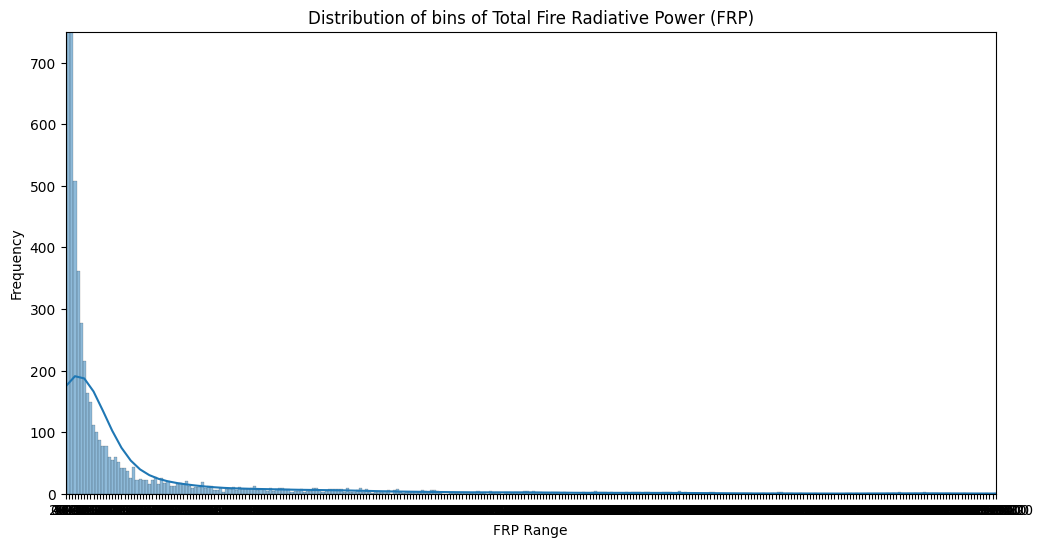

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(generalized_fires['FRP_Bin'], kde=True)
plt.title('Distribution of bins of Total Fire Radiative Power (FRP)')
plt.xlabel('FRP Range')
plt.ylabel('Frequency')

plt.ylim(0, 750)
plt.xlim(0, 300)

plt.show()

In [ ]:
generalized_fires.to_csv('California_Wildfire_Dataset.csv', index=False)

In [ ]:
generalized_fires.head(60)

,local_date_,Coordinate_Group_,Local_Time_Min,Max_Brightness,Mean_Brightness,Max_Confidence,Mean_Confidence,FRP,Day_Night,Time_Period,Total_Fire_Incidents,local_Time_Min,FRP_Bin
0,2015-01-03,South-East,10:46:00,328.5,328.500000,86,86.000000,37.4,D,Morning,1,10:46,20-40
1,2015-01-07,North-Central,13:37:00,322.2,321.800000,81,81.000000,28.3,D,Afternoon,2,13:37,20-40
2,2015-01-12,North-Central,13:56:00,322.6,322.600000,82,82.000000,140.0,D,Afternoon,1,13:56,140-160
3,2015-01-12,South-East,21:41:00,311.0,311.000000,81,81.000000,15.7,N,Night,1,21:41,0-20
4,2015-01-13,North-Central,13:01:00,332.2,326.966667,88,84.666667,40.3,D,Afternoon,3,13:01,40-60
5,2015-01-13,South-East,12:59:00,357.4,345.100000,99,90.500000,77.1,D,Afternoon,4,12:59,60-80
6,2015-01-20,South-East,13:05:00,351.4,343.866667,96,92.666667,82.0,D,Afternoon,3,13:05,80-100
7,2015-01-22,North-Central,12:56:00,358.1,358.100000,91,91.000000,105.4,D,Afternoon,1,12:56,100-120
8,2015-01-24,North-Central,22:07:00,314.6,314.600000,90,90.000000,14.9,N,Night,1,22:07,0-20
9,2015-01-24,South-East,22:06:00,324.2,324.200000,100,100.000000,26.4,N,Night,1,22:06,20-40
